<a href="https://colab.research.google.com/github/jlucianotom/AnalisisEstudiante/blob/main/Robot_Trading_LT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Robot Trading - Challenge BootCamp Data Science Alura

## 0. Configuración del ambiente

In [ ]:
# Información General del Código
def saludo():
    print("\033[1m\033[97m" + "_____________________________________")
    print("\033[1m\033[97m" + "Algoritmo: Robot Trading")
    print("\033[1m\033[97m" + "Desarrollado por: Luciano Tom")
    print("\033[1m\033[97m" + "BootCamp: Data Science III - Alura")
    print("\033[1m\033[97m" + "Fecha Inicio: 01/04/2024")
    print("\033[1m\033[97m" + "Fecha Fin: 09/04/2024")
    print("\033[1m\033[97m" + "_____________________________________")


**Objetivo:** Construir un Robot Trading en Python capaz de tomar decisiones de compra y venta de Bitcoin en tiempo real, ¿interesante verdad?, aqui te proporciono el paso a paso que deberás realizar

## 1. Configuración del ambiente

Importando librerias principales

In [ ]:
# Importar librerías necesarias
import pandas as pd  # Librería para manipulación de datos
import numpy as np  # Librería para operaciones numéricas
import seaborn as sns  # Librería para visualización de datos estadísticos
import matplotlib.pyplot as plt  # Librería para visualización de gráficos
import yfinance as yf  # Librería para obtener datos financieros
from bs4 import BeautifulSoup  # Librería para analizar contenido HTML
import requests  # Librería para realizar solicitudes HTTP
import re  # Librería para expresiones regulares
from datetime import datetime, timedelta  # Importar clases datetime y timedelta para manipulación de fechas
import datetime  # Importar módulo datetime para manipulación de fechas

# Declarar variables globales
global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision


## 2. Obtención de datos

In [ ]:
# Importa el historico de los precios del BitCoin de los últimos 7 días en intervalos de 5 minutos
def importar_base_bitcoin():
    ''' Importa el historico de los precios del BitCoin de los últimos 7 días en intervalos de 5 minutos'''
    global df_bitcoin

    end_day = datetime.datetime.today()
    period = datetime.timedelta(days=7)
    start_day = end_day - period

    ticker = yf.Ticker('BTC-USD')

    df_bitcoin = ticker.history(start=start_day, end=end_day, interval='5m')

# Extrae el precio actual y la tendencia a la 'baja' o 'alta' del BitCoin
def extraer_tendencias():
    ''' Extrae el precio actual y la tendencia a la 'baja' o a la 'alta' del BitCoin'''
    global precio_actual, tendencia

    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Gecko/20100101 Firefox/118.0'}
    url = 'https://coinmarketcap.com/'

    respuesta = requests.get(url, headers=headers)
    soup = BeautifulSoup(respuesta.content, 'lxml')

    filas = soup.find_all('tr')
    dict_datos = {}  # Inicializar dict_datos antes del bucle

    for f in filas:
        names = f.findAll('p', {'class': "sc-4984dd93-0 kKpPOn"})
        actual_prices = f.findAll('div', {'class': "sc-a0353bbc-0 gDrtaY"})
        tendencias = f.findAll('span', {'class': "sc-d55c02b-0"})

        if not (len(names) == 1 and len(actual_prices) == 1 and len(tendencias) == 3):
            continue

        dict_datos = procesar(names[0], actual_prices[0], tendencias)

        if 'Bitcoin' in dict_datos:
            break

    precio_actual = dict_datos.get('Bitcoin', {}).get('precio_actual')  # Obtener el precio actual de dict_datos si existe
    tendencia = dict_datos.get('Bitcoin', {}).get('tendencia1h')  # Obtener la tendencia de dict_datos si existe

# Procesar datos de Bitcoin obtenidos de la página web
def procesar(nombre, precio_actual, tendencias):
    clase_tendencia = {
        'icon-Caret-down': 'baja',
        'icon-Caret-up': 'alta'
    }
    salida = {
        nombre.text: {
            'precio_actual': float(re.sub('[$,]', '', precio_actual.text)),
            'tendencia1h': clase_tendencia[tendencias[0].span['class'][0]],
            'tendencia24h': clase_tendencia[tendencias[1].span['class'][0]],
            'tendencia7d': clase_tendencia[tendencias[2].span['class'][0]]
        }
    }

    return salida

## 3. Limpieza de datos

In [ ]:
# Importa datos históricos de Bitcoin y muestra las primeras dos filas del DataFrame df_bitcoin.
importar_base_bitcoin()
df_bitcoin

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-04-03 05:50:00+00:00,66039.539062,66039.539062,65982.023438,66011.460938,0,0.0,0.0
2024-04-03 05:55:00+00:00,66100.750000,66121.289062,66100.750000,66121.289062,0,0.0,0.0
2024-04-03 06:00:00+00:00,66111.992188,66235.531250,66088.054688,66235.531250,0,0.0,0.0
2024-04-03 06:05:00+00:00,66236.242188,66259.476562,66226.671875,66226.671875,0,0.0,0.0
2024-04-03 06:10:00+00:00,66248.398438,66249.015625,66130.921875,66130.921875,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-10 05:30:00+00:00,69308.539062,69318.671875,69308.539062,69318.671875,5451776,0.0,0.0
2024-04-10 05:35:00+00:00,69346.375000,69371.210938,69310.242188,69310.242188,53821440,0.0,0.0
2024-04-10 05:40:00+00:00,69313.937500,69351.937500,69296.882812,69334.375000,0,0.0,0.0


In [ ]:
# Toma decisiones basadas en las variables asignadas
def limpieza_datos():
    global df_bitcoin, media_bitcoin

    # Crear un duplicado
    df_bitcoin_limpio = df_bitcoin.copy()

    # Tratar duplicados en el índice (Datetime)
    df_bitcoin_limpio = df_bitcoin_limpio[~df_bitcoin_limpio.index.duplicated()]

    # Valores nulos en Close
    df_bitcoin_limpio = df_bitcoin_limpio[df_bitcoin_limpio.Close.notna()]

    # Valores de Volume mayores a 0
    df_bitcoin_limpio = df_bitcoin_limpio.query('Volume > 0')

    # Eliminar outliers
    Q1 = df_bitcoin_limpio.Close.quantile(0.25)
    Q3 = df_bitcoin_limpio.Close.quantile(0.75)
    IQR = Q3 - Q1
    min_close = Q1 - 1.5 * IQR
    max_close = Q3 + 1.5 * IQR
    df_bitcoin_limpio = df_bitcoin_limpio.query('Close >= @min_close & Close <= @max_close')

    # Seleccionar los datos de Close entre Q1 y Q3
    df_bitcoin_limpio_caja = df_bitcoin_limpio.query('Close >= @Q1 & Close <= @Q3')

    # Promedio de los datos de Close entre Q1 y Q3
    media_bitcoin = df_bitcoin_limpio_caja.Close.mean()

    return df_bitcoin_limpio  # Devolver el DataFrame limpio

# Llamar a la función y asignar el resultado a una variable
df_bitcoin_limpio = limpieza_datos()

In [ ]:
limpieza_datos()
df_bitcoin_limpio


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-04-03 06:25:00+00:00,66323.882812,66323.882812,66308.656250,66322.726562,19271680,0.0,0.0
2024-04-03 06:30:00+00:00,66331.382812,66354.296875,66292.289062,66292.289062,2203648,0.0,0.0
2024-04-03 07:15:00+00:00,66476.226562,66476.226562,66440.640625,66440.640625,34701312,0.0,0.0
2024-04-03 07:20:00+00:00,66481.984375,66500.632812,66397.593750,66397.593750,12365824,0.0,0.0
2024-04-03 08:35:00+00:00,66372.632812,66488.257812,66372.632812,66488.257812,60960768,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-10 05:20:00+00:00,69295.492188,69295.492188,69233.601562,69262.945312,57069568,0.0,0.0
2024-04-10 05:25:00+00:00,69252.710938,69293.546875,69235.679688,69291.117188,28172288,0.0,0.0
2024-04-10 05:30:00+00:00,69308.539062,69318.671875,69308.539062,69318.671875,5451776,0.0,0.0


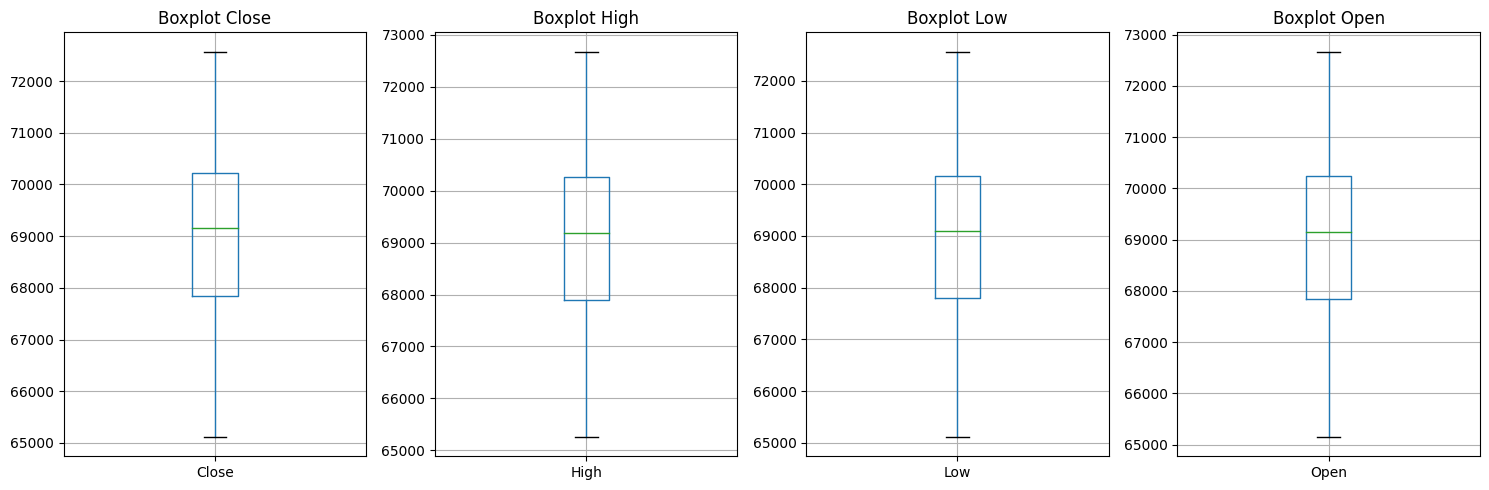

In [ ]:
# Importar la librería matplotlib para visualización de gráficos
import matplotlib.pyplot as plt  # Importar la función pyplot de matplotlib

# Llamar a la función limpieza_datos para realizar operaciones de limpieza en los datos
limpieza_datos()

# Crear subplots para los cuatro boxplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Graficar cada columna en un subplot separado sin mostrar los valores atípicos
df_bitcoin_limpio.boxplot(column=["Close"], ax=axes[0], showfliers=False)
df_bitcoin_limpio.boxplot(column=["High"], ax=axes[1], showfliers=False)
df_bitcoin_limpio.boxplot(column=["Low"], ax=axes[2], showfliers=False)
df_bitcoin_limpio.boxplot(column=["Open"], ax=axes[3], showfliers=False)

# Añadir títulos a los subplots
axes[0].set_title('Boxplot Close')
axes[1].set_title('Boxplot High')
axes[2].set_title('Boxplot Low')
axes[3].set_title('Boxplot Open')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los graficos
plt.show()


## 4. Tomar decisiones

In [ ]:
# Llamar a las funciones para obtener los datos
importar_base_bitcoin()
extraer_tendencias()

# Toma decisiones basadas en las variables globales precio_actual, tendencia, media_bitcoin y asigna el resultado a algoritmo_decision.
def tomar_decisiones():
  global precio_actual, tendencia, media_bitcoin, algoritmo_decision

if 'precio_actual' in locals() and 'media_bitcoin' in locals() and 'tendencia' in locals():
    if precio_actual is not None and media_bitcoin is not None and tendencia is not None:
        if precio_actual >= media_bitcoin and tendencia == 'baja':
            algoritmo_decision = 'Vender'
        elif precio_actual < media_bitcoin and tendencia == 'alta':
            algoritmo_decision = 'Comprar'
        else:
            algoritmo_decision = ''
    else:
        algoritmo_decision = 'Datos faltantes'
else:
    algoritmo_decision = 'Datos no disponibles'

# Verifica si todas las variables necesarias están disponibles y no son None para tomar una decisión sobre el algoritmo.
if 'precio_actual' in locals() and 'media_bitcoin' in locals() and 'tendencia' in locals():
    if precio_actual is not None and media_bitcoin is not None and tendencia is not None:
        if precio_actual >= media_bitcoin and tendencia == 'baja':
            algoritmo_decision = 'Vender'
        elif precio_actual < media_bitcoin and tendencia == 'alta':
            algoritmo_decision = 'Comprar'
        else:
            algoritmo_decision = ''
    else:
        algoritmo_decision = 'Datos faltantes'
else:
    algoritmo_decision = 'Datos no disponibles'

# Llama a la función tomar_decisiones para determinar la acción a tomar basada en las variables globales, y luego accede al valor de la variable precio_actual.
tomar_decisiones()
precio_actual

## 5. Visualización

In [ ]:
# Se agrega una def para el grafico
def visualizacion():
  global df_bitcoin, precio_actual, tendencia, media_bitcoin,  algoritmo_decision

  df_bitcoin['Promedio'] = media_bitcoin

  color_legend = {
    'baja': 'b',  # Cambié 'r' a 'blue' para que sea más claro
    'alta': 'g'  # Cambié 'g' a 'green' para que sea más claro
  }

  plt.figure(figsize = (20, 6))
  plt.title('Histórico de los últimos 7 días del Bitcoin (USD)')
  sns.lineplot(data = df_bitcoin[['Close', 'Promedio']], palette = {'Close' : 'b', 'Promedio' : 'r'})
  #plt.annotate(f'A la {tendencia}', (df_bitcoin.index.max(), df_bitcoin.tail(1).Close), color = color_legend[tendencia])
  plt.show()

## 6. Automatización

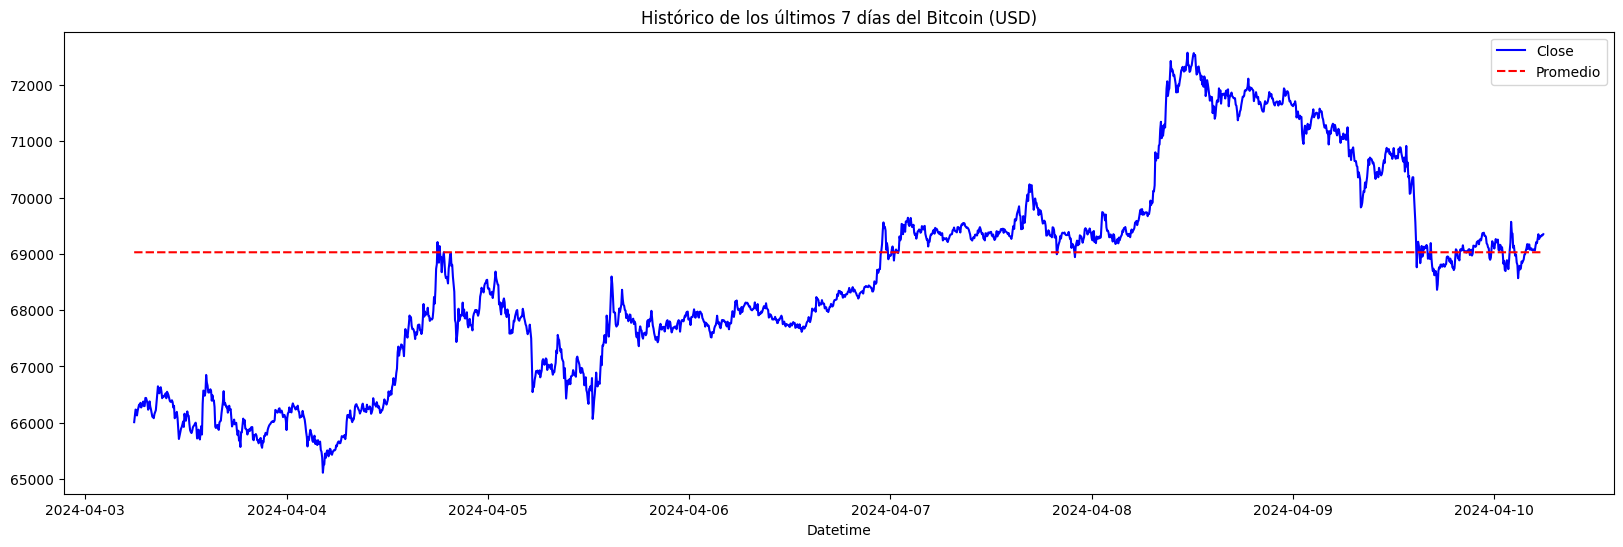

_____________________________________
Algoritmo: Robot Trading
Desarrollado por: Luciano Tom
BootCamp: Data Science III - Alura
Fecha Inicio: 01/04/2024
Fecha Fin: 09/04/2024
_____________________________________


KeyboardInterrupt: 

In [ ]:
# Importar librerias a utilizar
from IPython.display import clear_output
import time

# Se agrega proceso un clico repetitivo
while(True):
  clear_output()
  importar_base_bitcoin()
#  extraer_tendencias()
  limpieza_datos()
#  tomar_decisiones()
  visualizacion()
  saludo()
  time.sleep(300)